In [1]:
import time
import numpy as np
import xgboost as xgb
from xgboost import plot_importance,plot_tree

from sklearn.datasets import load_iris,load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib inline



In [2]:
#加载数据集
iris = load_iris()
X,y = iris.data,iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

feature_name = iris.feature_names


In [3]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

dtrain = xgb.DMatrix(X_train, y_train,feature_names=feature_name)
dtest = xgb.DMatrix(X_test,feature_names=feature_name)

In [4]:
num_rounds = 5000
model = xgb.train(params, dtrain, num_rounds)
y_pred =  model.predict(dtest)

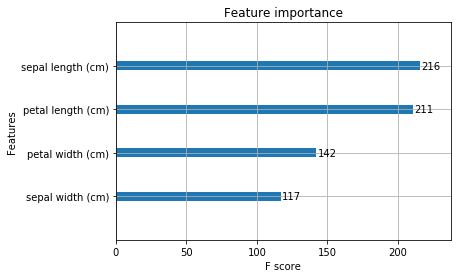

In [5]:
accu = accuracy_score(y_test,y_pred)

plot_importance(model)
plt.show()


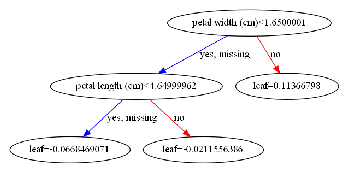

In [6]:
plot_tree(model,num_trees=5)

In [7]:
model.dump_model("data/model_iris")
